Load the data and quick look


In [ ]:
import pandas as pd


amazon_stock_df =pd.read_csv('AMZN.csv')
amazon_stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


Description of different columns

In [ ]:
amazon_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


By generating histograms, we can visually inspect the distribution of numerical features in the dataset.

Identify Outliers: Histograms help in spotting outliers and unusual data points in the features.
Understand Data Spread: They provide insights into the spread and central tendency of the data.
Feature Engineering: The visual information can be useful for feature engineering, such as deciding on transformations or handling skewed data.

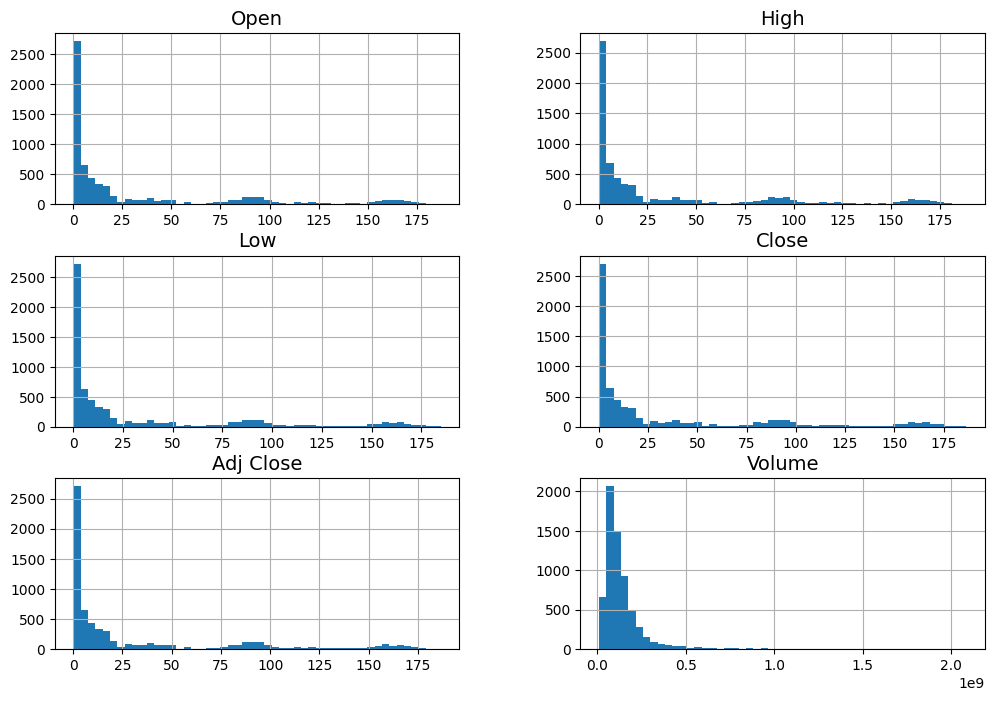

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=34)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Generate histograms for each numerical column in the DataFrame
amazon_stock_df.hist(bins=50, figsize=(12, 8)) # Plot histograms with 50 bins and a figure size of 12x8 inches
plt.show()

more graphs

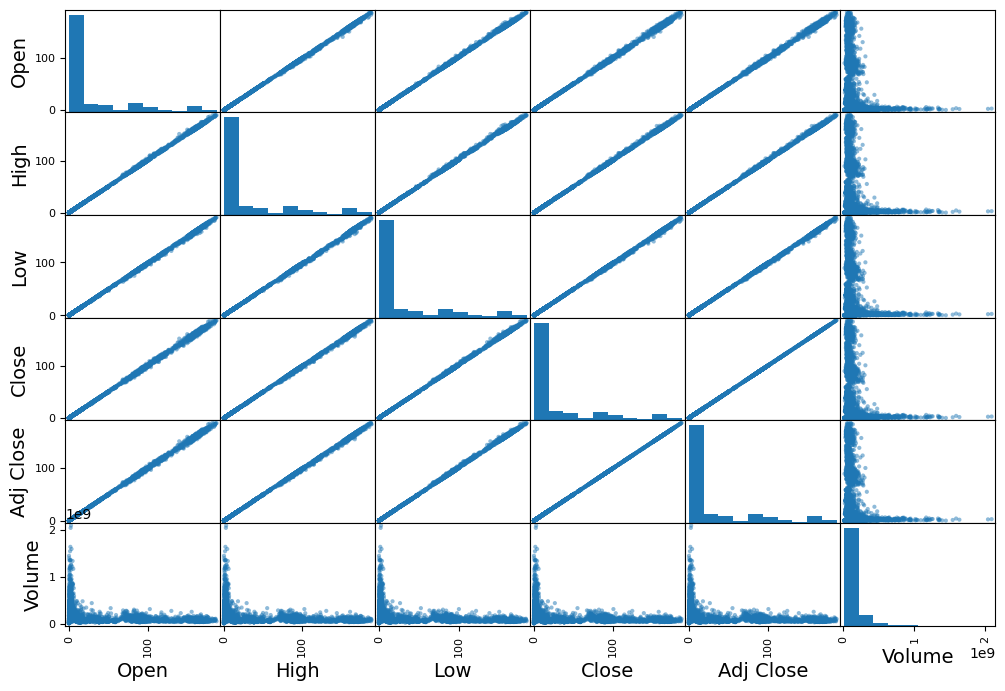

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
scatter_matrix(amazon_stock_df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [ ]:

# Selecting features (Open, High, Low, Volume) and target (Close)
X = amazon_stock_df[['Open', 'High', 'Low', 'Volume']]  # Features
y = amazon_stock_df['Close']  # Target (Close price)
y.head()


,Close
0,0.097917
1,0.086458
2,0.085417
3,0.081771
4,0.071354


Selecting feature and predictor

In [ ]:
# Number of days to predict into the future
days_to_predict = 50

# New prediction column (shifting 'Close' column up by 90 days)
amazon_stock_df['Prediction'] = amazon_stock_df['Close'].shift(-days_to_predict)

## Removing the rows with NaN values (which occur after the shift)
amazon_stock_df = amazon_stock_df.dropna()
amazon_stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.116146
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.123958
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.122396
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.119792
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.120833


# Split into training and testing sets

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaling the data

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Use Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Store RMSE results for each model
rmse_results = {}

# Create and train the linear regression model
lin_reg = LinearRegression()

# Perform 10-fold cross-validation using randomly splitted training set on the Decision Tree Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
lin_reg_rmses = -cross_val_score(lin_reg, X_train_scaled, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

#lin_reg.fit(X_train_scaled, y_train)
rmse_results['Linear Regression'] = pd.Series(lin_reg_rmses).mean()
pd.Series(lin_reg_rmses).describe()



,0
count,10.000000
mean,0.429059
std,0.039927
min,0.365165
25%,0.406601
50%,0.427664
75%,0.453072
max,0.499933


Use Decision Tree model

In [ ]:
# prompt: Use Decision Tree model as above ccode i did for LinearRegression

from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree Regression model
tree_reg = DecisionTreeRegressor()

# Perform 10-fold cross-validation using randomly splitted training set on the Decision Tree Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
tree_reg_rmses = -cross_val_score(tree_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Decision Tree Regression'] = pd.Series(tree_reg_rmses).mean()
pd.Series(tree_reg_rmses).describe()

# You can now compare the RMSE results of Linear Regression and Decision Tree Regression
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668}


Use RandomForestRegressor model

In [ ]:
# prompt: do same thing as above modle for RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regression model
forest_reg = RandomForestRegressor()

# Perform 10-fold cross-validation using randomly splitted training set on the Random Forest Regressor
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
forest_reg_rmses = -cross_val_score(forest_reg, X_train_scaled, y_train,
                                  scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Random Forest Regression'] = pd.Series(forest_reg_rmses).mean()
pd.Series(forest_reg_rmses).describe()

# You can now compare the RMSE results of Linear Regression, Decision Tree Regression, and Random Forest Regression
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744}


Use  SVR (Support Vector Regressor) Model

In [ ]:
# prompt: I want to do same thing as above by using  SVR (Support Vector Regressor) Model

from sklearn.svm import SVR

# Create and train the SVR model
svr_reg = SVR(kernel='rbf')  # You can experiment with different kernels (linear, poly, rbf)

# Perform 10-fold cross-validation using randomly splitted training set on the SVR model
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
svr_reg_rmses = -cross_val_score(svr_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['Support Vector Regression'] = pd.Series(svr_reg_rmses).mean()
pd.Series(svr_reg_rmses).describe()

# You can now compare the RMSE results of all models (Linear Regression, Decision Tree Regression, Random Forest Regression, and SVR)
# to determine which model performs better on your dataset.
print(rmse_results)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744, 'Support Vector Regression': 2.924357061950553}


KNeighborsRegressor

In [ ]:
# prompt: same as above for model KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNeighborsRegressor model
knn_reg = KNeighborsRegressor(n_neighbors=4)  # You can adjust the number of neighbors

# Perform 10-fold cross-validation using randomly splitted training set on the KNN model
# The negative sign is because cross_val_score returns negative values for metrics where lower is better
knn_reg_rmses = -cross_val_score(knn_reg, X_train_scaled, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

rmse_results['K-Nearest Neighbors Regression'] = pd.Series(knn_reg_rmses).mean()
pd.Series(knn_reg_rmses).describe()

# You can now compare the RMSE results of all models (Linear Regression, Decision Tree Regression, Random Forest Regression, SVR, and KNN)
# to determine which model performs better on your dataset.
print(rmse_results)
knn_reg.fit(X_train_scaled, y_train)

{'Linear Regression': 0.42905923337535057, 'Decision Tree Regression': 0.7786382010318668, 'Random Forest Regression': 0.5977306595714744, 'Support Vector Regression': 2.924357061950553, 'K-Nearest Neighbors Regression': 0.9100880707923944}


Plot a grph for different modle and their RMSE values

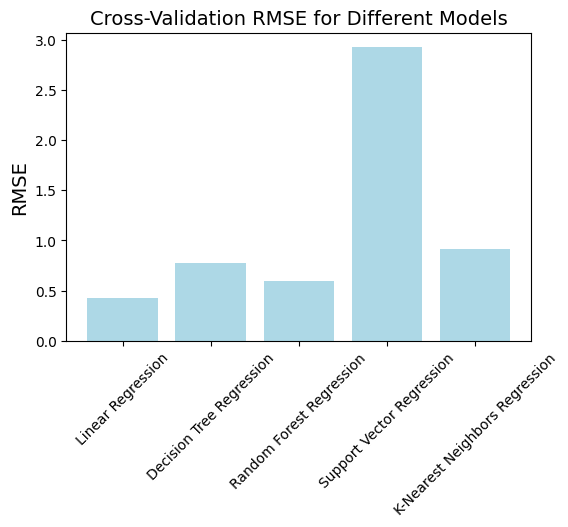

In [ ]:
# Plot cross-validation RMSE for comparison
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

Now test with test set

In [ ]:
# Evaluate the tuned model on the test set
import numpy as np
from sklearn.metrics import mean_squared_error
lin_reg.fit(X_train_scaled, y_train)
y_test_pred = lin_reg.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f' Linear Regression Test RMSE: {test_rmse}')
print(y_test[:5])
print(y_test_pred[:5])



 Linear Regression Test RMSE: 679810.4428636117
5934    155.820999
1872      1.698500
1002      0.846000
6038    158.073502
6225    161.413498
Name: Close, dtype: float64
[-191365.67387057 -683262.78482808 -329793.66026873 -209784.68960889
 -238951.96815208]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


plot a grpah with predicted and actual value

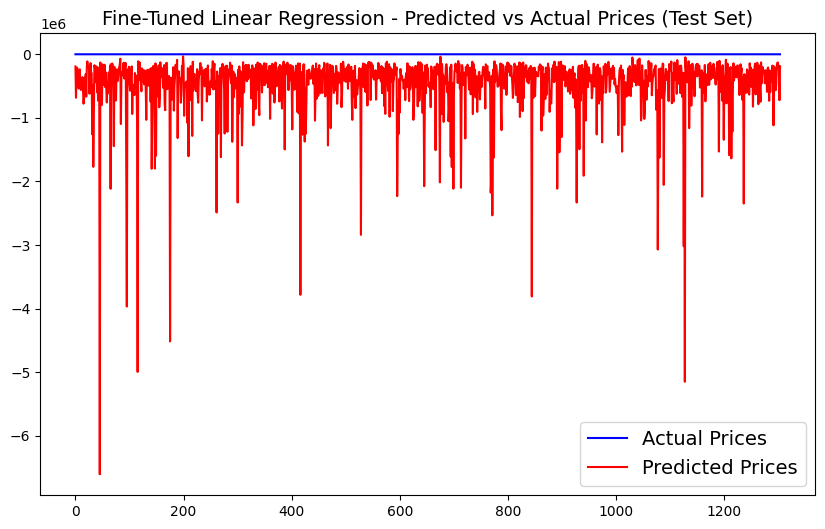

In [ ]:
# Plot predicted vs actual prices for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Prices', color='red')
plt.title('Fine-Tuned Linear Regression - Predicted vs Actual Prices (Test Set)')
plt.legend()
plt.show()

Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Best Cross-Validation RMSE: 8.530395385026377
Tuning hyperparameters for SVR...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVR Best Cross-Validation RMSE: 9.518519564271713
Tuning hyperparameters for KNeighbors...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
KNeighbors Best Cross-Validation RMSE: 8.892435179187556
Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision Tree Best Cross-Validation RMSE: 10.191045392366764
Evaluating Random Forest on the test set...
Random Forest Test RMSE: 8.003759364163665


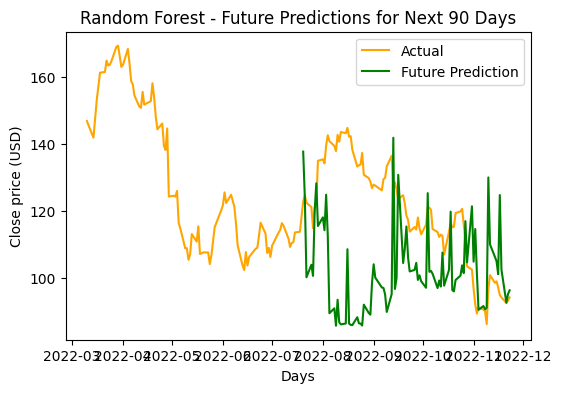

Evaluating SVR on the test set...
SVR Test RMSE: 8.41667695234184


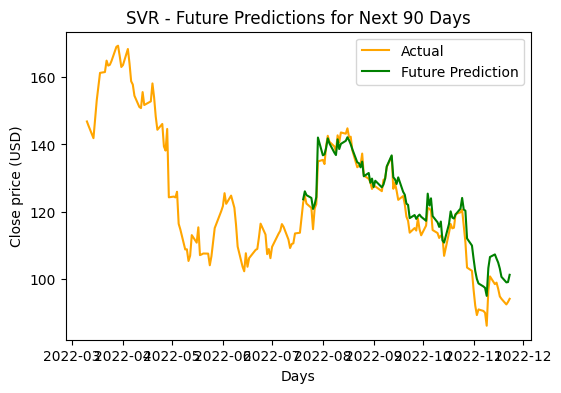

Evaluating KNeighbors on the test set...
KNeighbors Test RMSE: 8.226864365775477


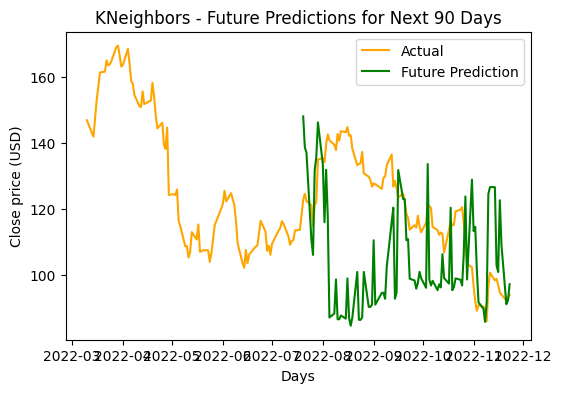

Evaluating Decision Tree on the test set...
Decision Tree Test RMSE: 10.92187873962496


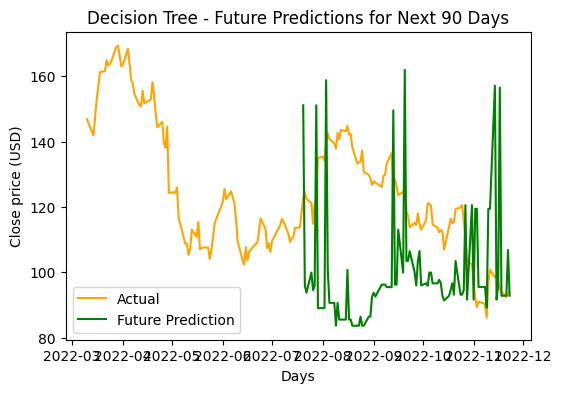

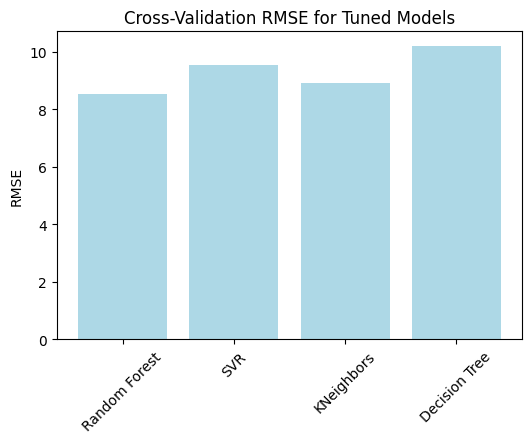

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (adjust the path to your dataset)
df = pd.read_csv('AMZN.csv')

# Convert 'Date' to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Number of days to predict into the future
days_to_predict = 90

# New prediction column (shifting 'Close' column up by 90 days)
df['Prediction'] = df['Close'].shift(-days_to_predict)

# Removing the rows with NaN values (which occur after the shift)
df = df.dropna()

# Splitting features and target
X = df[['Open', 'High', 'Low', 'Volume']]  # Adjusted features
y = df['Prediction']  # Adjusted target (90-day future close price)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their hyperparameter grids for tuning
model_params = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['rbf'],
            'C': [100, 1000],
            'gamma': [0.01, 0.001]
        }
    },
    'KNeighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}

# Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store RMSE results for each model
best_models = {}
rmse_results = {}

for name, mp in model_params.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Perform Cross-Validation RMSE
    cv_scores = -cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(cv_scores)

    # Save the mean cross-validated RMSE for comparison
    rmse_results[name] = np.mean(cv_rmse)
    print(f'{name} Best Cross-Validation RMSE: {np.mean(cv_rmse)}')

# --- Test the best models ---
for name, best_model in best_models.items():
    print(f"Evaluating {name} on the test set...")

    # Train the model on the full training set
    best_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_test_pred = best_model.predict(X_test_scaled)

    # Calculate RMSE for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'{name} Test RMSE: {test_rmse}')

    # --- Predict for the next "days_to_predict" days ---
    future_data = df[['Open', 'High', 'Low', 'Volume']].tail(days_to_predict)  # Selecting the last "days_to_predict" rows with consistent features

    # Scaling future data
    future_scaled = scaler.transform(future_data)

    # Making future predictions
    future_predictions = best_model.predict(future_scaled)

    # Plot future predictions
    future_index = df.index[-days_to_predict:]  # Get the index for the future days
    plt.figure(figsize=(6, 4))

    # Plot actual data for comparison
    plt.plot(df.index[-2 * days_to_predict:], df['Close'].tail(2 * days_to_predict), label='Actual', color='orange')
    plt.plot(future_index, future_predictions, label='Future Prediction', color='green')

    plt.title(f'{name} - Future Predictions for Next {days_to_predict} Days')
    plt.xlabel('Days')
    plt.ylabel('Close price (USD)')
    plt.legend()
    plt.show()

# --- Cross-validation RMSE comparison plot ---
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Tuned Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Get the best hyperparameters found by the grid search
print("Best parameters:", grid_search.best_params_)

# Get the best RMSE score (negative RMSE) found by the grid search
print("Best RMSE score:", -grid_search.best_score_)
grid_search.best_estimator_

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE score: 72.19215399908941


RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

Linear Regression Test RMSE: 0.19875807648672447
Linear Regression Test MAE: 0.15314717320660765


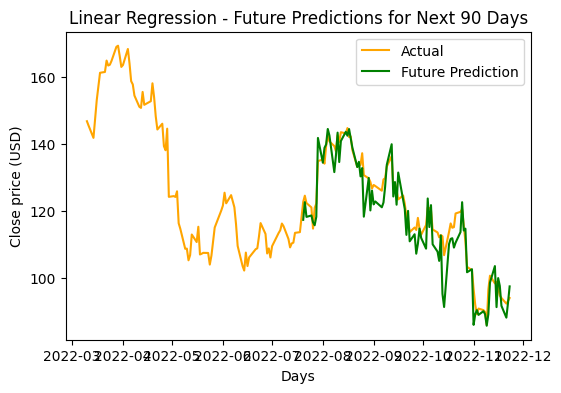

Decision Tree Test RMSE: 0.21357389177493905
Decision Tree Test MAE: 0.14093971887414825


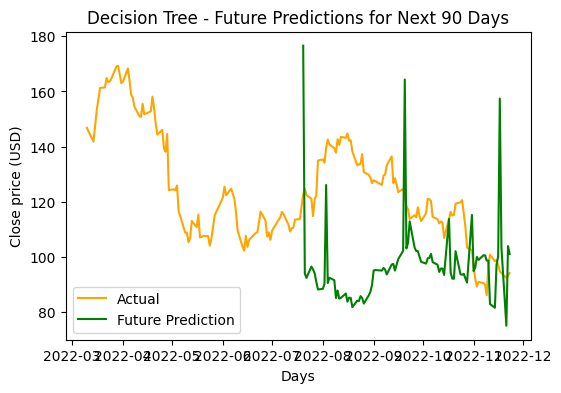

Random Forest Test RMSE: 0.16112503964941033
Random Forest Test MAE: 0.11552867223768978


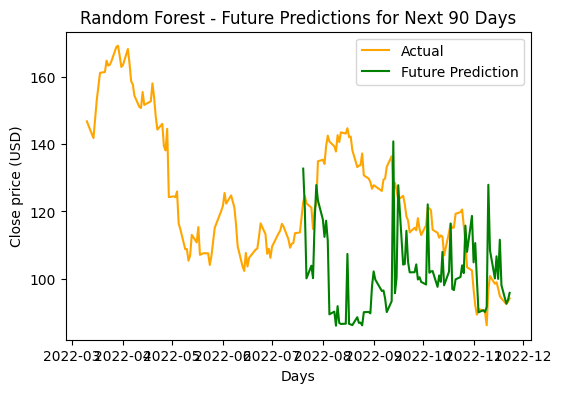

SVR Test RMSE: 0.1779725041752693
SVR Test MAE: 0.13770257309270642


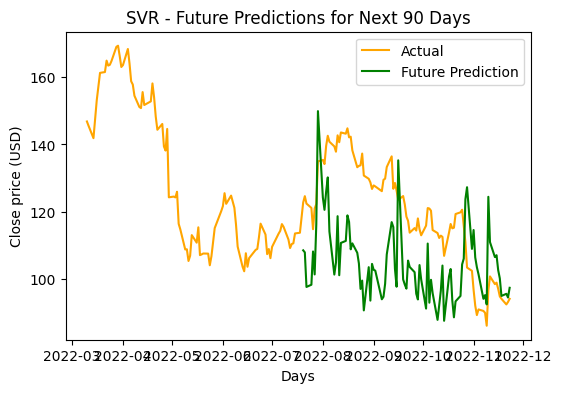

KNeighbors Test RMSE: 0.18900479928167702
KNeighbors Test MAE: 0.13670979909339145


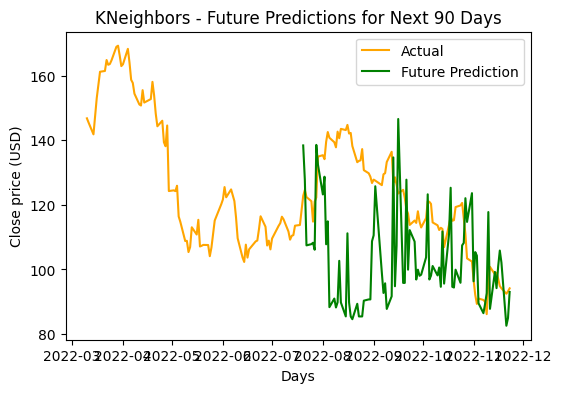

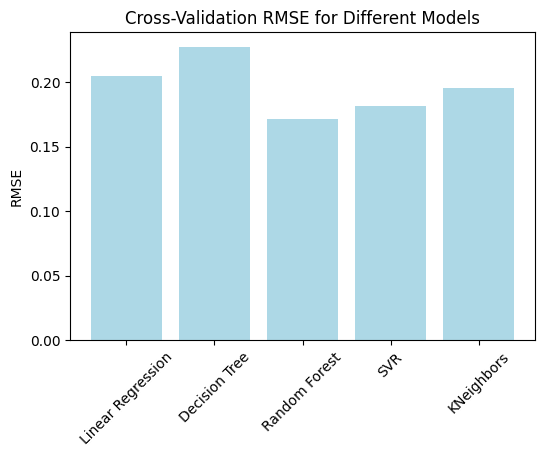

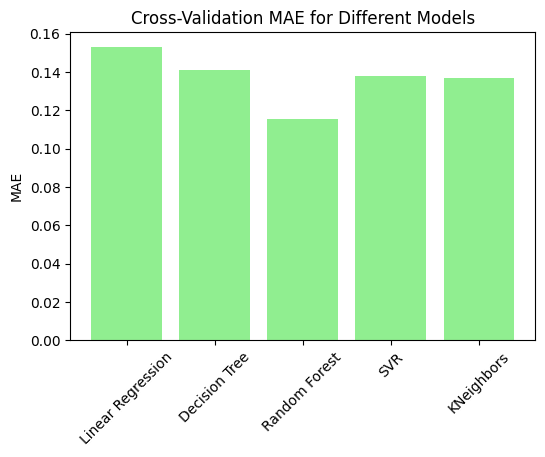

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AMZN.csv')

# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Applying log transformation to reduce skewness
df['Log_Open'] = np.log(df['Open'] + 1)
df['Log_High'] = np.log(df['High'] + 1)
df['Log_Low'] = np.log(df['Low'] + 1)
df['Log_Volume'] = np.log(df['Volume'] + 1)
df['Log_Close'] = np.log(df['Close'] + 1)

# Number of days to predict into the future
days_to_predict = 90

# New prediction column (shifting 'Log_Close' column up by 90 days)
df['Prediction'] = df['Log_Close'].shift(-days_to_predict)

# Removing rows with NaN values after the shift
df = df.dropna()

# Features and target (using log-transformed values)
X = df[['Log_Open', 'Log_High', 'Log_Low', 'Log_Volume']]
y = df['Prediction']  # Target is the future 90-day log-transformed close price

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42),
    'SVR': SVR(kernel='rbf', C=1e3),
    'KNeighbors': KNeighborsRegressor(n_neighbors=4)
}

# Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store RMSE and MAE results for each model
rmse_results = {}
mae_results = {}

# Train models with cross-validation and evaluate performance
for name, model in models.items():
    # Perform cross-validation on the scaled training data
    cv_scores_rmse = -cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(cv_scores_rmse)

    # Save the mean cross-validated RMSE for comparison
    rmse_results[name] = np.mean(cv_rmse)

    # Train the model on the full training set
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_scaled)

    # Calculate RMSE and MAE for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print RMSE and MAE for the test set
    print(f'{name} Test RMSE: {test_rmse}')
    print(f'{name} Test MAE: {test_mae}')

    # Save the MAE for comparison
    mae_results[name] = test_mae

    # --- Predict for the next "days_to_predict" days ---
    future_data = df[['Log_Open', 'Log_High', 'Log_Low', 'Log_Volume']].tail(days_to_predict)

    # Scaling future data
    future_scaled = scaler.transform(future_data)

    # Making future predictions
    future_predictions = model.predict(future_scaled)

    # Revert the log transformation for better interpretability
    future_predictions_reverted = np.exp(future_predictions) - 1

    # Plot future predictions
    future_index = df.index[-days_to_predict:]  # Get the index for the future days
    plt.figure(figsize=(6, 4))

    # Plot actual data for comparison (reverting log transform)
    plt.plot(df.index[-2 * days_to_predict:], np.exp(df['Log_Close'].tail(2 * days_to_predict)) - 1, label='Actual', color='orange')

    # Plot future predictions (reverted)
    plt.plot(future_index, future_predictions_reverted, label='Future Prediction', color='green')

    plt.title(f'{name} - Future Predictions for Next {days_to_predict} Days')
    plt.xlabel('Days')
    plt.ylabel('Close price (USD)')
    plt.legend()
    plt.show()

# --- Cross-validation RMSE comparison plot ---
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# --- Cross-validation MAE comparison plot ---
plt.figure(figsize=(6, 4))
plt.bar(mae_results.keys(), mae_results.values(), color='lightgreen')
plt.title('Cross-Validation MAE for Different Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


Evaluating Linear Regression without hyperparameter tuning...
Linear Regression Best Cross-Validation RMSE: 10.501927541806392
Linear Regression Best Estimator: LinearRegression()
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Best Cross-Validation RMSE: 8.530395385026377
Random Forest Best RMSE score from GridSearch (Negative): 73.04768173210323
Random Forest Best Estimator: RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, random_state=42)
Tuning hyperparameters for SVR...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
SVR Best Parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVR Best Cross-Validation RMSE: 9.518519564271713
SVR Best RMSE score from GridSearch (Negative): 91.031383823066
SVR Best Estimator: SV

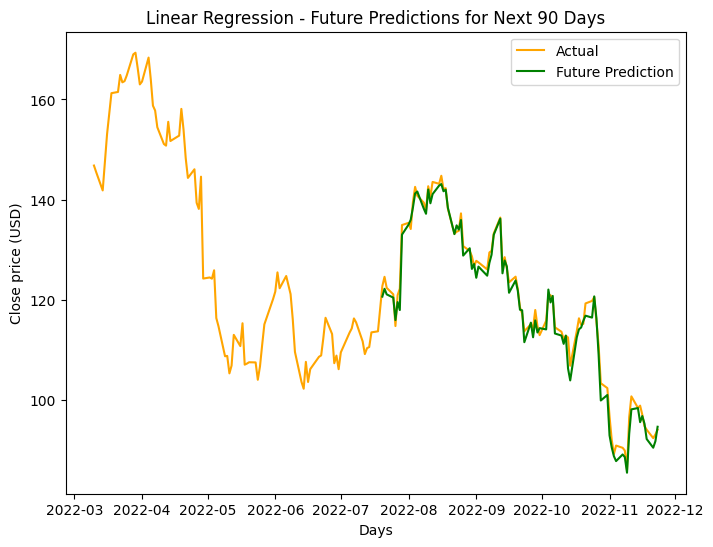

Evaluating Random Forest on the test set...
Random Forest Test RMSE: 8.003759364163665


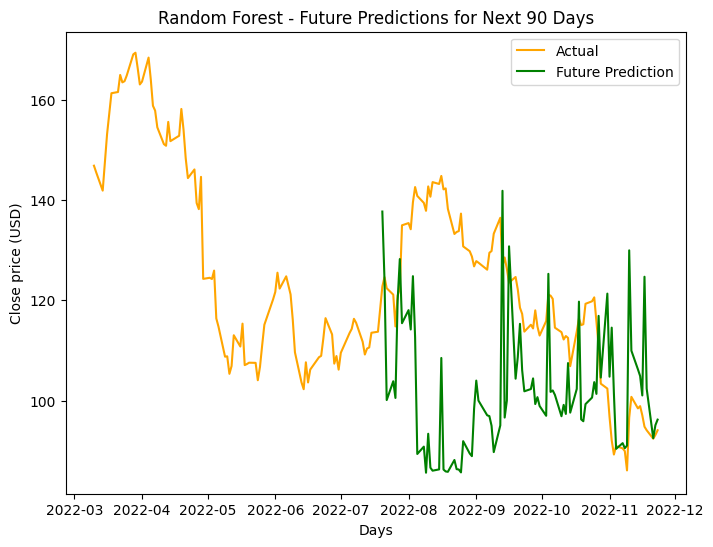

Evaluating SVR on the test set...
SVR Test RMSE: 8.41667695234184


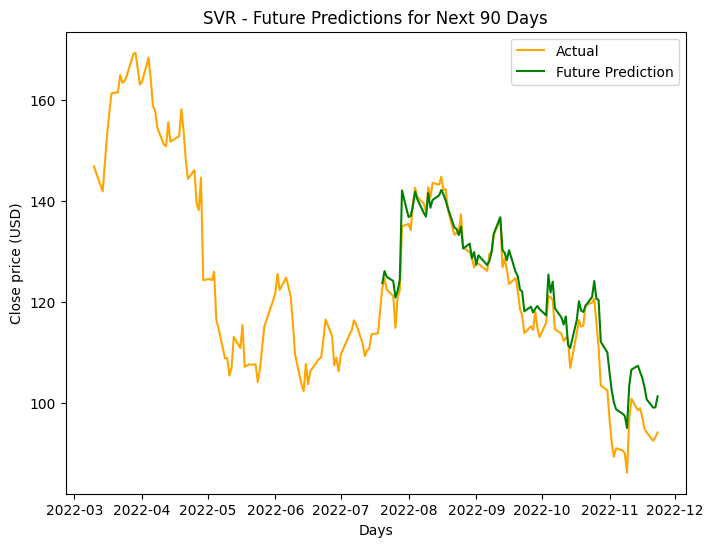

Evaluating KNeighbors on the test set...
KNeighbors Test RMSE: 8.226864365775477


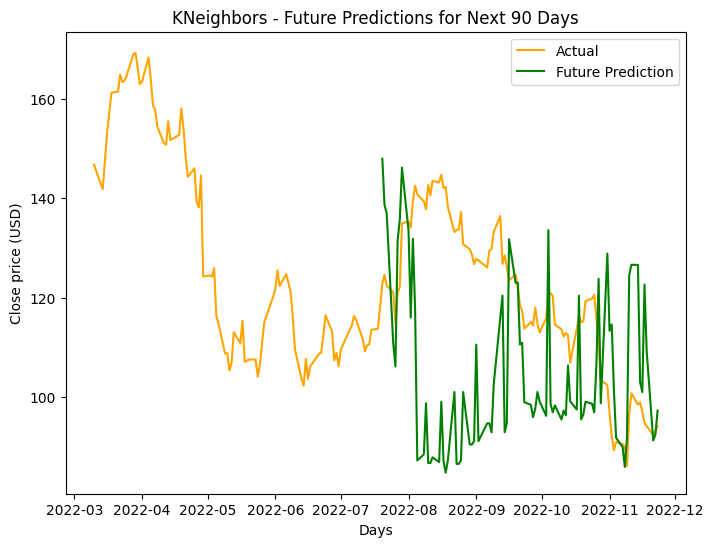

Evaluating Decision Tree on the test set...
Decision Tree Test RMSE: 10.92187873962496


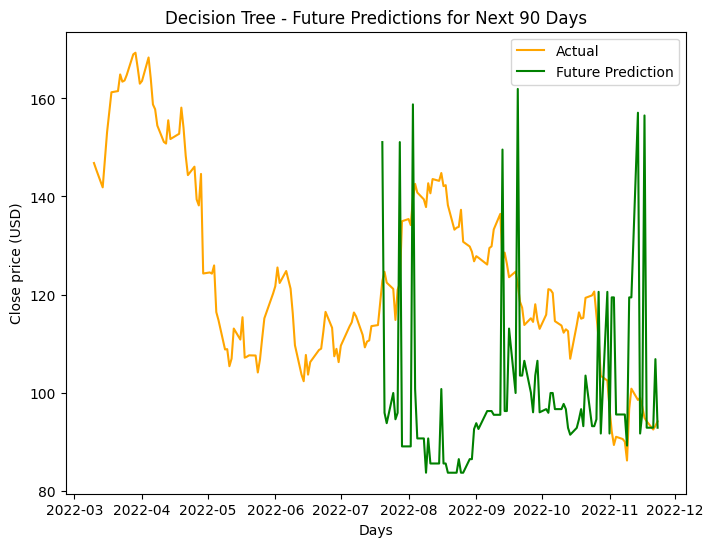

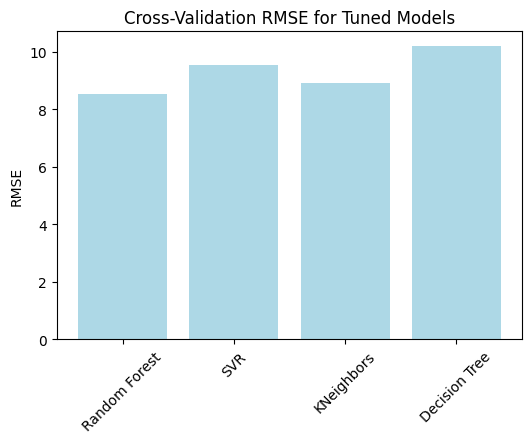

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (adjust the path to your dataset)
df = pd.read_csv('AMZN.csv')

# Convert 'Date' to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Number of days to predict into the future
days_to_predict = 90

# New prediction column (shifting 'Close' column up by 90 days)
df['Prediction'] = df['Close'].shift(-days_to_predict)

# Removing the rows with NaN values (which occur after the shift)
df = df.dropna()

# Splitting features and target
X = df[['Open', 'High', 'Low', 'Volume']]  # Adjusted features
y = df['Prediction']  # Adjusted target (90-day future close price)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and their hyperparameter grids for tuning
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune for linear regression
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['rbf'],
            'C': [100, 1000],
            'gamma': [0.01, 0.001]
        }
    },
    'KNeighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}

# Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store RMSE results for each model
best_models = {}
rmse_results = {}

# Loop through models
for name, mp in model_params.items():
    if name == 'Linear Regression':
        print(f"Evaluating {name} without hyperparameter tuning...")
        model = mp['model']
        model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
        cv_scores = -cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(cv_scores)
        best_models[name] = model  # Save the model
        print(f'{name} Best Cross-Validation RMSE: {np.mean(cv_rmse)}')
        print(f'{name} Best Estimator: {model}')
    else:
        print(f"Tuning hyperparameters for {name}...")
        grid_search = GridSearchCV(mp['model'], mp['params'], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)

        best_model = grid_search.best_estimator_
        best_models[name] = best_model  # Save the best model

        # Perform Cross-Validation RMSE
        cv_scores = -cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(cv_scores)

        # Save the mean cross-validated RMSE for comparison
        rmse_results[name] = np.mean(cv_rmse)

        # Get and print best parameters and RMSE
        print(f'{name} Best Parameters: {grid_search.best_params_}')
        print(f'{name} Best Cross-Validation RMSE: {np.mean(cv_rmse)}')
        print(f'{name} Best RMSE score from GridSearch (Negative): {-grid_search.best_score_}')
        print(f'{name} Best Estimator: {best_model}')

# --- Test the best models ---
for name, best_model in best_models.items():
    print(f"Evaluating {name} on the test set...")

    # Train the model on the full training set
    best_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_test_pred = best_model.predict(X_test_scaled)

    # Calculate RMSE for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'{name} Test RMSE: {test_rmse}')

    # --- Predict for the next "days_to_predict" days ---
    future_data = df[['Open', 'High', 'Low', 'Volume']].tail(days_to_predict)  # Selecting the last "days_to_predict" rows with consistent features

    # Scaling future data
    future_scaled = scaler.transform(future_data)

    # Making future predictions
    future_predictions = best_model.predict(future_scaled)

    # Plot future predictions
    future_index = df.index[-days_to_predict:]  # Get the index for the future days
    plt.figure(figsize=(8, 6))

    # Plot actual data for comparison
    plt.plot(df.index[-2 * days_to_predict:], df['Close'].tail(2 * days_to_predict), label='Actual', color='orange')
    plt.plot(future_index, future_predictions, label='Future Prediction', color='green')

    plt.title(f'{name} - Future Predictions for Next {days_to_predict} Days')
    plt.xlabel('Days')
    plt.ylabel('Close price (USD)')
    plt.legend()
    plt.show()

# --- Cross-validation RMSE comparison plot ---
plt.figure(figsize=(6, 4))
plt.bar(rmse_results.keys(), rmse_results.values(), color='lightblue')
plt.title('Cross-Validation RMSE for Tuned Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()
